### Importing the data

In [1]:
#Extracting the images
import tarfile

#file downloaded from http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar and saved as 'stanford_dogs_images.tar'

#Extraction of folders of images
my_tar = tarfile.open('stanford_dogs_images.tar')
my_tar.extractall('./stanford_dogs_images') # specify which folder to extract to
my_tar.close()


In [2]:
random_seed=1994

In [188]:
import os
import tensorflow as tf

from skimage import io
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


In [302]:
N_Breeds=5
Batch_Size=20

In [95]:
fpath = "./stanford_dogs_images/Images/" #Place where all the folders of images are stored

breeds_folders = os.listdir(fpath) #names of the folders for each breed

#Selecting the number of breeds:
breeds_folders=breeds_folders[:N_Breeds]

#transforming to just the name of the breeds:
breeds=[]
for name in breeds_folders[:Batch_Size]:
    breeds+=[name[10:]]

print("Number of breeds: ",len(breeds))

Number of breeds:  5


In [96]:
#Checking the number of images of dogs per breed
imagesinside=0
imagesperbreed=[]
for i, breedfolder in enumerate(breeds_folders):
    for image in os.listdir(fpath+"/"+breedfolder):
        imagesinside+=1
    imagesperbreed+=[imagesinside]
    imagesinside=0

about_each_breed=pd.DataFrame(list(zip(breeds,imagesperbreed)),columns=["Breed","Number of Images"])
about_each_breed["original_order"]=about_each_breed.index+1 #Adding column to know the original order of the folders
about_each_breed.head()

,Breed,Number of Images,original_order
0,Chihuahua,152,1
1,Japanese_spaniel,185,2
2,Maltese_dog,252,3
3,Pekinese,149,4
4,Shih-Tzu,214,5


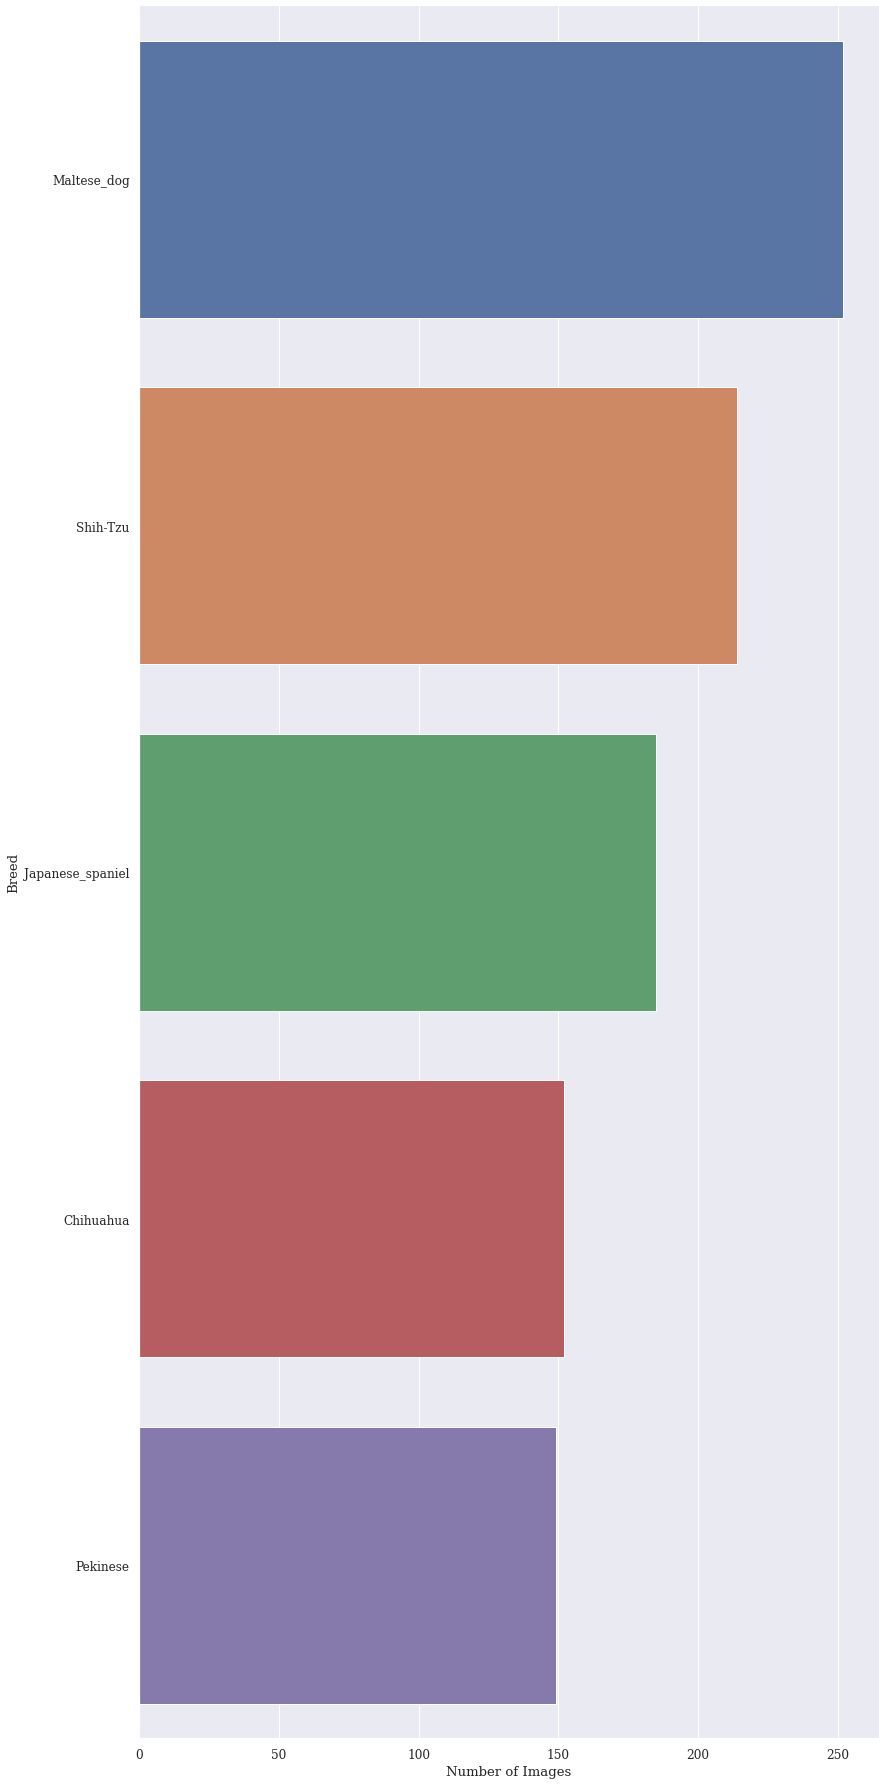

In [97]:
sns.set_theme(style="darkgrid",font_scale=1.1,font="serif")
sns.catplot(y="Breed", x="Number of Images",data=about_each_breed.sort_values(by=["Number of Images"],ascending=False),
            kind="bar",orient="h",height=25, aspect=0.5)

plt.show()

In [99]:
#This function performs the following actions:
#1 Reads every image from every folder of each breed
#2 Resizes the images
#3 Puts all the images and labels of each image in a numpy array

def LoadingImagesResizingAndLabels(breeds_folders,lenght,width):
    theimages=[]
    thelabels=[]
    for i, breedfolder in enumerate(breeds_folders): #names of the folders for each breed
        print(breedfolder,"...")
        for image_name in os.listdir(fpath+"/"+breedfolder): #names for each image inside the folders
            img = io.imread(fpath+"/"+breedfolder+"/"+image_name) #load image from file in RGB
            rezised=resize(img,(lenght,width)) #resizing image
            theimages.append(np.array(rezised)) #appending the images
            thelabels.append(i) #appending the labels
    imagesnp = np.array(theimages) #transforming list of images to numpy array
    labelsnp = np.array(thelabels) #transforming list of images to numpy array

    print("Number of Images:",len(imagesnp))
    print("Number of Breeds:",len(breeds_folders))
    print("Size of each image:",lenght,",",width)
    return imagesnp, labelsnp

In [365]:
#Loading the images, resizing them, and loading the labels:
lenght=224
width=224
images, labels = LoadingImagesResizingAndLabels(breeds_folders,lenght,width)

n02085620-Chihuahua ...
n02085782-Japanese_spaniel ...
n02085936-Maltese_dog ...
n02086079-Pekinese ...
n02086240-Shih-Tzu ...
Number of Images: 952
Number of Breeds: 5
Size of each image: 224 , 224


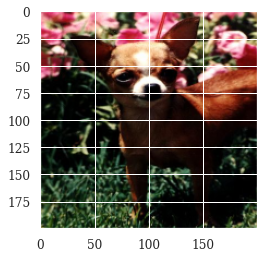

In [262]:
plt.imshow(images[1])
plt.show()

In [122]:
#Creating a binary class matrix with the breed types:
label_output_matrix = utils.to_categorical(labels, num_classes = N_Breeds)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [288]:
# Dividing data into training and testing (stratified)
X_train, X_test, y_train, y_test = train_test_split(images, label_output_matrix, test_size=0.2, random_state=random_seed,stratify=label_output_matrix)

#For data augmentation, we also need validation set:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed,stratify=y_train)

# from keras.utils import np_utils
print("For training without data augmentation:")
print("x_train shape = ",X_train.shape)
print("y_train shape = ",y_train.shape)

print("\nFor training with data augmentation:")
print("x_train2 shape = ",X_train2.shape)
print("y_train2 shape = ",y_train2.shape)
print("\nx_val shape = ",X_val.shape)
print("y_val shape = ",y_val.shape)

print("\nFor both cases:")
print("\nx_test shape = ",X_test.shape)
print("y_test shape = ",y_test.shape)


For training without data augmentation:
x_train shape =  (761, 200, 200, 3)
y_train shape =  (761, 5)

x_test shape =  (191, 200, 200, 3)
y_test shape =  (191, 5)

For training with data augmentation:
x_train2 shape =  (608, 200, 200, 3)
y_train2 shape =  (608, 5)

x_val shape =  (153, 200, 200, 3)
y_val shape =  (153, 5)

x_test shape =  (191, 200, 200, 3)
y_test shape =  (191, 5)


In [ ]:
# #LeNet
# model = Sequential()
# # CONV => RELU => POOL
# model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=(lenght,width,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# # CONV => RELU => POOL
# model.add(Conv2D(50, kernel_size=5, padding="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# # Flatten => RELU layers
# model.add(Flatten())
# model.add(Dense(500))
# model.add(Activation("relu"))

# # a softmax classifier
# model.add(Dense(N_Breeds))
# model.add(Activation("softmax"))

In [364]:
#l=224,h=224
#AlexNet2012
model = Sequential()
# CONV => RELU => POOL
model.add(Conv2D(20, kernel_size=11, padding="same", input_shape=(lenght,width,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(3,3), padding='same'))

# CONV => RELU => POOL
model.add(Conv2D(50, kernel_size=5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(3,3), padding='same'))

# CONV => RELU x3
model.add(Conv2D(20, kernel_size=3, padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(20, kernel_size=3, padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(20, kernel_size=3, padding="same"))
model.add(Activation("relu"))

# POOL
model.add(MaxPooling2D(pool_size=(3,3), strides=(3,3), padding='same'))

# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation("relu"))

# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation("relu"))


# a softmax classifier
model.add(Dense(N_Breeds))
model.add(Activation("softmax"))

In [349]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 200, 200, 20)      1520      
                                                                 
 activation_42 (Activation)  (None, 200, 200, 20)      0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 100, 100, 20)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 100, 100, 50)      25050     
                                                                 
 activation_43 (Activation)  (None, 100, 100, 50)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 50, 50, 50)       0         
 g2D)                                                

### Without data Augmentation

In [350]:
history = model.fit(X_train, y_train, batch_size=Batch_Size, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
31/31 [==============================] - 22s 687ms/step - loss: 3.3854 - accuracy: 0.2796 - val_loss: 1.6125 - val_accuracy: 0.2484
Epoch 2/10
31/31 [==============================] - 20s 642ms/step - loss: 1.4274 - accuracy: 0.3865 - val_loss: 1.5328 - val_accuracy: 0.3464
Epoch 3/10
31/31 [==============================] - 19s 619ms/step - loss: 1.1644 - accuracy: 0.5444 - val_loss: 1.8516 - val_accuracy: 0.3268
Epoch 4/10
31/31 [==============================] - 20s 637ms/step - loss: 0.8021 - accuracy: 0.7155 - val_loss: 1.6133 - val_accuracy: 0.3791
Epoch 5/10
31/31 [==============================] - 19s 608ms/step - loss: 0.3479 - accuracy: 0.8898 - val_loss: 1.9141 - val_accuracy: 0.3725
Epoch 6/10
31/31 [==============================] - 19s 625ms/step - loss: 0.1603 - accuracy: 0.9556 - val_loss: 2.3646 - val_accuracy: 0.3268
Epoch 7/10
31/31 [==============================] - 30s 974ms/step - loss: 0.0773 - accuracy: 0.9819 - val_loss: 3.7631 - val_accuracy: 0.3333

6/6 [==============================] - 1s 140ms/step - loss: 4.0316 - accuracy: 0.3770

Test score/loss: 4.031565189361572
Test accuracy: 0.376963347196579
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


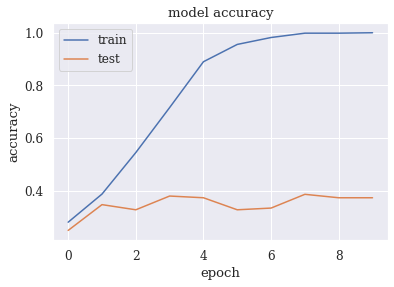

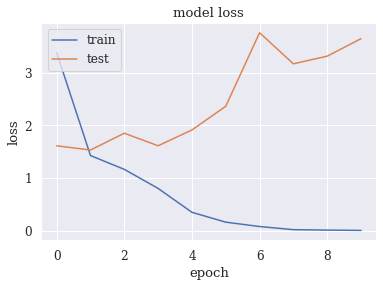

In [351]:
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [352]:
from sklearn import metrics
label_pred = model.predict(X_test)
pred = []

for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index


print(metrics.classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.35      0.27      0.30        30
           1       0.50      0.43      0.46        37
           2       0.58      0.49      0.53        51
           3       0.20      0.13      0.16        30
           4       0.26      0.44      0.33        43

    accuracy                           0.38       191
   macro avg       0.38      0.35      0.36       191
weighted avg       0.40      0.38      0.38       191



### With data augmentation

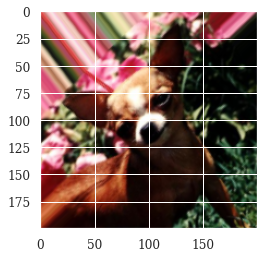

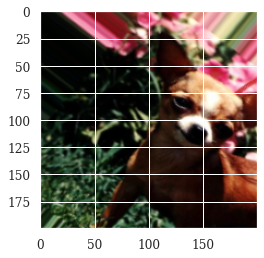

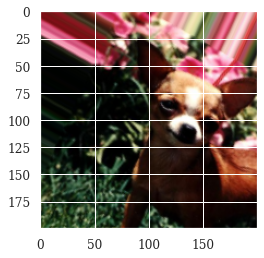

In [353]:
# From https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
# To try to see the data generator effects
# example:
from numpy import expand_dims

from keras.preprocessing.image import ImageDataGenerator

data = images[1]

#expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-20,20],height_shift_range=0.20,
							horizontal_flip=True,rotation_range=45,zoom_range=[0.85,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(3):
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0]
	# plot raw pixel data
	plt.imshow(image)
	# show the figure
	pyplot.show()

In [358]:
from keras.preprocessing.image import ImageDataGenerator
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-10,10],height_shift_range=0.10,
							horizontal_flip=True,rotation_range=45,zoom_range=[0.95,1.0])

# create the iterator
it = datagen.flow(X_train2,y_train2)

# step_per_epoch=int(len(X_train)/Batch_Size) #Num of batches of samples comprising one epoch
step_per_epoch=15

In [359]:
history = model.fit(it,steps_per_epoch=step_per_epoch, batch_size=Batch_Size, epochs=15, verbose=1,validation_data=(X_val, y_val))

Epoch 1/15
15/15 [==============================] - 14s 902ms/step - loss: 1.3646 - accuracy: 0.4187 - val_loss: 1.3488 - val_accuracy: 0.4510
Epoch 2/15
15/15 [==============================] - 14s 903ms/step - loss: 1.3875 - accuracy: 0.4292 - val_loss: 1.3883 - val_accuracy: 0.4771
Epoch 3/15
15/15 [==============================] - 14s 883ms/step - loss: 1.3989 - accuracy: 0.4229 - val_loss: 1.3519 - val_accuracy: 0.5229
Epoch 4/15
15/15 [==============================] - 14s 897ms/step - loss: 1.3262 - accuracy: 0.4583 - val_loss: 1.3221 - val_accuracy: 0.4967
Epoch 5/15
15/15 [==============================] - 14s 888ms/step - loss: 1.3746 - accuracy: 0.4125 - val_loss: 1.3692 - val_accuracy: 0.4444
Epoch 6/15
15/15 [==============================] - 14s 888ms/step - loss: 1.3404 - accuracy: 0.4708 - val_loss: 1.3438 - val_accuracy: 0.4706
Epoch 7/15
15/15 [==============================] - 14s 896ms/step - loss: 1.3238 - accuracy: 0.4521 - val_loss: 1.3820 - val_accuracy: 0.4641

6/6 [==============================] - 1s 128ms/step - loss: 1.3967 - accuracy: 0.4293

Test score/loss: 1.3967032432556152
Test accuracy: 0.4293193817138672
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


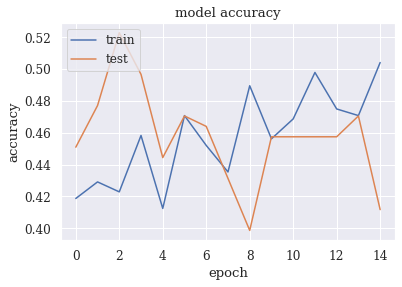

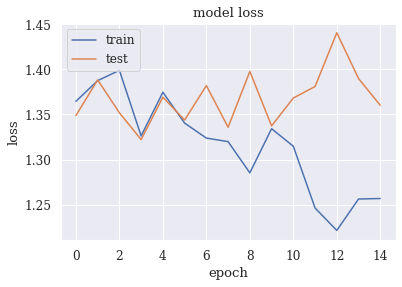

In [360]:
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [362]:
from sklearn import metrics
label_pred = model.predict(X_test)
pred = []

for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index


print(metrics.classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.20      0.28        30
           1       0.47      0.65      0.55        37
           2       0.50      0.76      0.60        51
           3       0.22      0.07      0.10        30
           4       0.28      0.26      0.27        43

    accuracy                           0.43       191
   macro avg       0.39      0.39      0.36       191
weighted avg       0.39      0.43      0.39       191

